# Лабораторная работа №1

## Парная линейная регрессия

**Цель работы** 
Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

**Содержание работы** 
 - Загрузить данные из тектовых файлов.
 - Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.
 - Оценить на графике качество построенной модели.
 - Построить кривые обучения.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [53]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [54]:
y.head()

,Unnamed: 0,0
0,0,101.159902
1,1,78.442913
2,2,-159.238195
3,3,120.719533
4,4,2.920673


In [55]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)["0"]
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)["0"]

In [56]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [57]:
x.shape, y.shape

((20,), (20,))

Видим, что x и y - одномерные массивы, каждый из которых состоит из 20 элементов

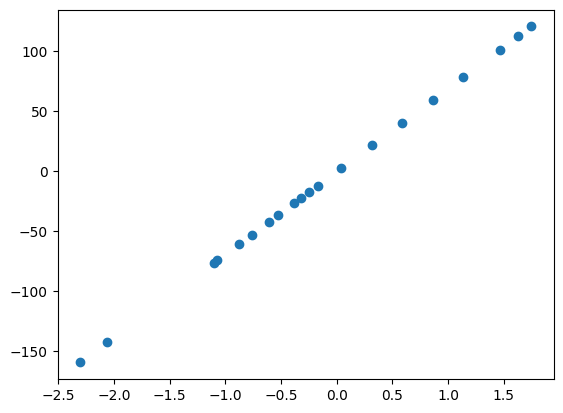

In [58]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [59]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 1
        self.b1 = 1
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, x, y):
        """J = y_pred - y_true"""
        return sum((self.predict(x) - y)**2) / (2 * len(y))
    def fit(self, x, y):
        alpha = 0.5
        for _ in range(100):
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

In [60]:
model = Model()
print(model.predict(0))
print(model.predict(100))
print("Начальная ошибка: ", model.error(x, y))

1
101
Начальная ошибка:  2862.9340147066887


In [61]:
model.fit(x, y)
print("Конечная ошибка: ", model.error(x, y))

Конечная ошибка:  7.948266658167457e-29


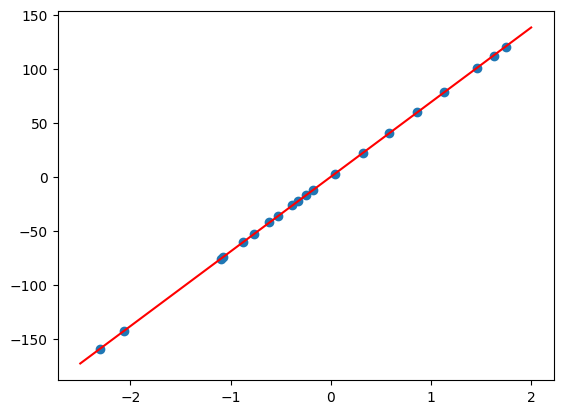

In [62]:
plt.figure()
plt.scatter(x, y)

x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, 'r')

plt.show()

Добавим возможность рисования кривых обучения, которые позволят понять как изменяется ошибка данной модели со временем

In [ ]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, x, y):
        """J = y_pred - y_true"""
        return sum((self.predict(x) - y)**2) / (2 * len(y))
    def fit(self, x, y):
        alpha = 0.5
        errors = [] # добавили массив errors
        for _ in range(20):
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            errors.append(self.error(x, y))
        return errors

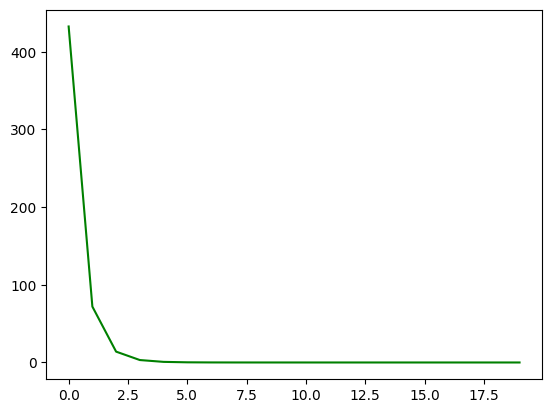

In [72]:
model = Model()
errors = model.fit(x, y)
plt.plot(errors, 'g')

На графике обучения можно проследить влияние значения параметра alpha на обучение

In [ ]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, x, y):
        """J = y_pred - y_true"""
        return sum((self.predict(x) - y)**2) / (2 * len(y))
    def fit(self, x, y):
        alpha = 0.1 # уменьшили значение alpha
        errors = [] 
        for _ in range(20):
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            errors.append(self.error(x, y))
        return errors

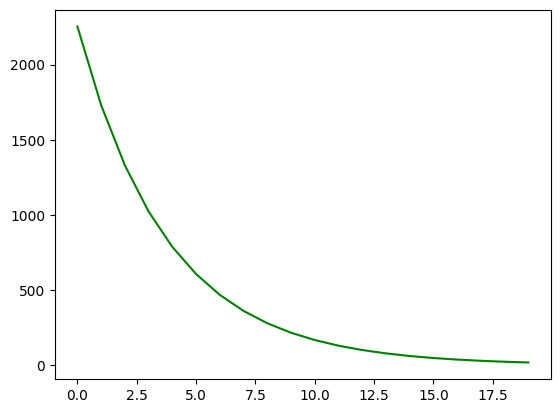

In [98]:
model = Model()
errors = model.fit(x, y)
plt.plot(errors, 'g')

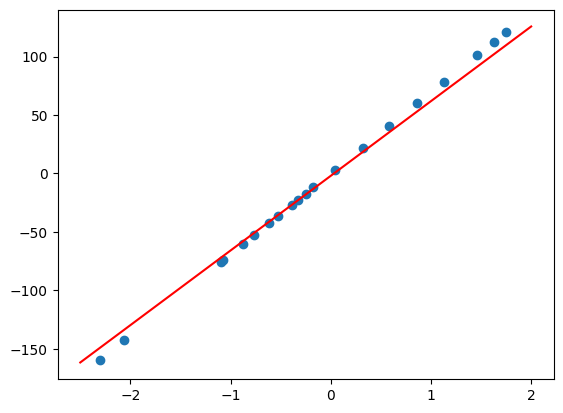

In [75]:
plt.figure()
plt.scatter(x, y)

x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, 'r')

plt.show()

Видим, что кривая не так быстро снижается, градиентный спуск работает медленно и 20 итераций не хватает для близкого подхода к оптимуму

При слишком большом значении alpha градиентный спуск начинает расходиться. Применим адаптивную скорость обучения

In [ ]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, x, y):
        """J = y_pred - y_true"""
        return sum((self.predict(x) - y)**2) / (2 * len(y))
    def fit(self, x, y):
        alpha = 500
        errors = [self.error(x, y), ] # записываем изначальную ошибку для избегания ошибок при первом запуске
        for _ in range(20):
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_error = self.error(x, y) # ошибка после шага градиентного спуска
            old_error = errors[-1]
            if new_error > old_error:
                alpha /= 2
                self.__init__() # перезапускаем градиентный спуск заново

            errors.append(self.error(x, y))
        return errors

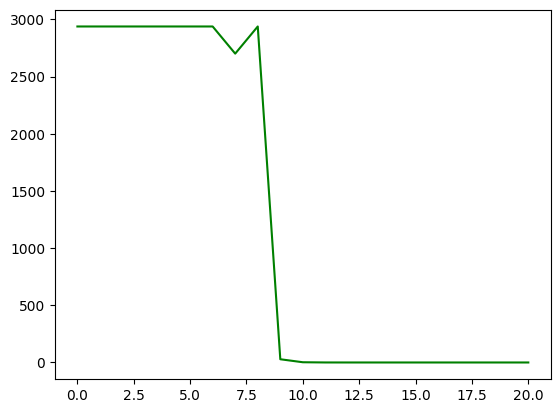

In [88]:
model = Model()
errors = model.fit(x, y)
plt.plot(errors, 'g')

Видим, что первые несколько итераций алгоритм подстраивается. Теперь можем задавать любое значение alpha и проблема расходимости алгоритма будет решена

Раннее завершение градиентного спуска

In [94]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""
    def __init__(self, max_iter = 100): # добавляем параметр max_iter для изменения количества итераций
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, x, y):
        """J = y_pred - y_true"""
        return sum((self.predict(x) - y)**2) / (2 * len(y))
    def fit(self, x, y):
        alpha = 0.1
        errors = [self.error(x, y), ] 
        for _ in range(self.max_iter): # используем параметр
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_error = self.error(x, y) 
            old_error = errors[-1]
            if new_error > old_error:
                alpha /= 2
                self.__init__()

            if old_error - new_error < 0.001: # боремся с большим количеством итераций
                break
            errors.append(self.error(x, y))
        else:
            print('Warning!') # предупреждение о недостаточном обучении
        return errors

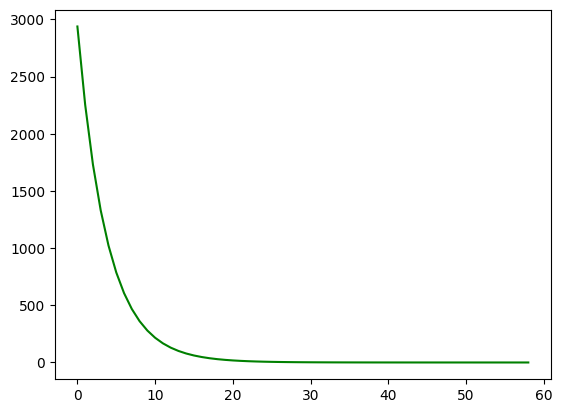

In [96]:
model = Model(max_iter = 200)
errors = model.fit(x, y)
plt.plot(errors, 'g')

# Множественная линейная регрессия на чистых данных

**Цель работы** 
Познакомиться с основными приемами работы с множественными регрессионными моделями с использованием библиотеки sklearn.

**Содержание работы** 
Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.
Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.
Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.
Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv")

In [101]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


Видим ошибку: некорректное считывание первой строки

In [102]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

In [103]:
x.shape, y.shape

((387, 5), (387, 1))

Видим, что обе переменные представляют собой двумерные массивы

In [104]:
from sklearn.linear_model import LinearRegression

Создаем объект линейной регрессии

In [105]:
binary0 = LinearRegression()

In [106]:
x[[0]].shape

(387, 1)

In [107]:
binary0.fit(x[[0]], y) # обучаем модель

LinearRegression()

In [ ]:
binary0.coef_ # выводим коэффициент b1

array([[22.78111342]])

In [109]:
binary0.intercept_ # выводим коэффициент b0

array([-4.05666473])

In [110]:
binary0.predict([[1]])

array([[18.72444869]])

Предсказываем для первого значения первого столбца

In [111]:
binary0.predict(x[[0]].iloc[0:1])

array([[-2.42004238]])

In [112]:
y[0][0]

63.320498108708165

Построим диаграмму рассеяния

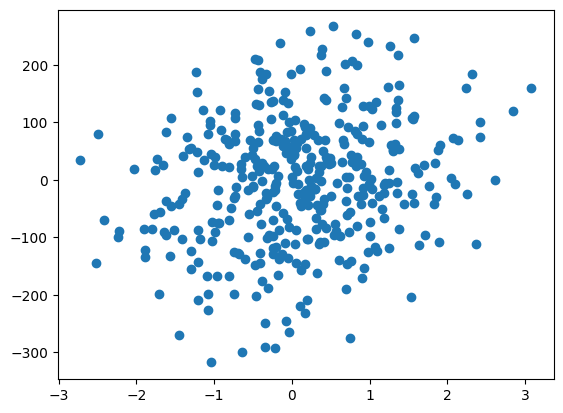

In [113]:
plt.scatter(x[0], y)

In [115]:
y_pred = binary0.predict(x[[0]]) # предсказанные значения y для каждой строки первого столбца
y_pred 

array([[-2.42004238e+00],
       [-8.78210657e-01],
       [ 3.29925173e+01],
       [-3.10120198e+01],
       [-2.19025875e+01],
       [ 6.60489450e+01],
       [ 1.53292018e+00],
       [-9.48419200e+00],
       [-2.88367465e-01],
       [-4.69952278e+01],
       [-4.09231806e+01],
       [-2.70194581e+01],
       [ 1.17518386e+01],
       [-7.03559131e-02],
       [ 1.89831172e+01],
       [-1.16383540e+01],
       [-8.74458735e+00],
       [-4.09081352e+01],
       [-3.96006351e+01],
       [-8.11923054e+00],
       [ 1.70292960e+01],
       [-1.25041007e+00],
       [ 1.62900230e+01],
       [ 3.28798224e-01],
       [ 1.28098294e+00],
       [ 2.43481882e+01],
       [-3.11598811e+00],
       [ 6.01712725e+00],
       [ 2.86931625e+00],
       [ 1.17934534e+01],
       [ 2.87601089e+01],
       [ 4.68571901e+01],
       [ 1.33428473e+01],
       [ 1.28246961e+01],
       [-2.87904472e+01],
       [ 5.33892874e+00],
       [ 3.29446046e+00],
       [ 1.00257106e+01],
       [-5.9

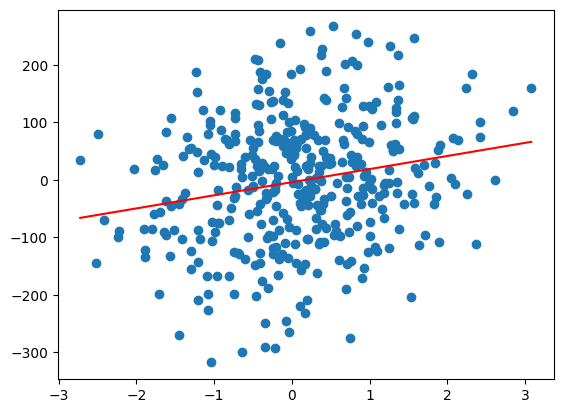

In [117]:
plt.scatter(x[0], y)

xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1))
plt.plot(xx, binary0.predict(xx), c = 'r')

Коэффициент детерминации

In [118]:
binary0.score(x[[0]], y)

0.04364336234689348

Коэффициент очень низкий, значит корреляции практически нет между x и y

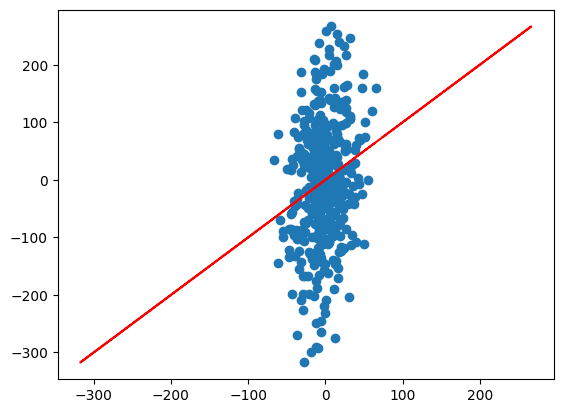

In [119]:
plt.scatter(y_pred, y)
plt.plot(y, y, 'r')

Теоритические значения находятся далеко от практических, следовательно модель некачественная

In [120]:
binary1 = LinearRegression().fit(x[[1]], y) # берем второой столбец 

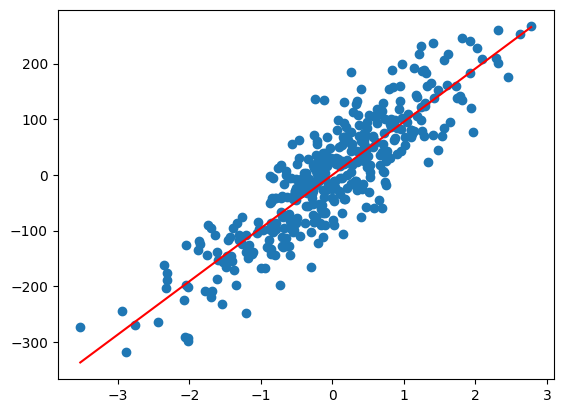

In [121]:
plt.scatter(x[1], y)

xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary1.predict(xx), c = 'r')

In [122]:
binary1.score(x[[1]], y)

0.7699743283650629

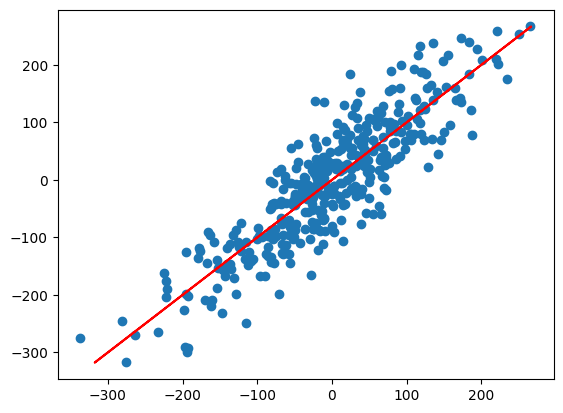

In [123]:
y_pred = binary1.predict(x[[1]])
plt.scatter(y_pred, y)
plt.plot(y, y, 'r')

Найдем коэффициент детерминации для всех столбцов

In [124]:
for i in range(5):
    binary = LinearRegression().fit(x[[i]], y)
    print(i, binary.score(x[[i]], y))

0 0.04364336234689348
1 0.7699743283650629
2 0.18794528514998887
3 0.047470345664983093
4 0.00017176151145947838


Множественная модель

In [125]:
multiple = LinearRegression().fit(x, y)
multiple.score(x, y)

0.9922198026415868

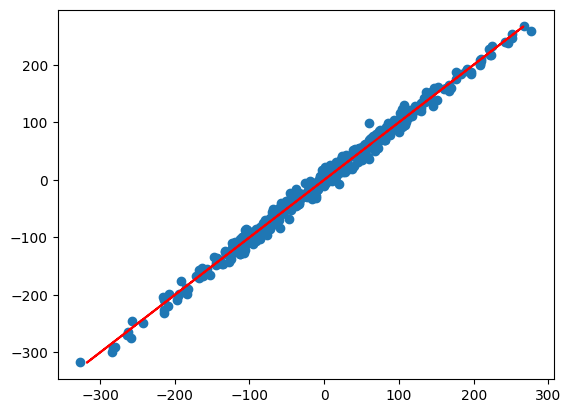

In [126]:
y_pred = multiple.predict(x)
plt.scatter(y_pred, y)
plt.plot(y, y, 'r')

Видим, что модель практически идеальна и предсказывает нашу целевую переменную y практически идеально

In [ ]:
multiple.coef_ # выводим массив коэффициентов b

array([[15.79537523, 93.21521093, 37.19410687, 31.19129121, -0.23773114]])

In [128]:
multiple.intercept_

array([0.56498354])